In [1]:
import re, os
from wordcloud import WordCloud, STOPWORDS
import pandas as pd
from matplotlib.pyplot import imshow
from nltk.tokenize import sent_tokenize
import matplotlib.pyplot as plt
import plotly.express as px

# Loading the data

In [2]:
path = './bbc/'

In [3]:
directories = os.listdir(path)
directories

['business', 'entertainment', 'politics', 'README.TXT']

In [4]:
directories.remove('README.TXT')
directories

['business', 'entertainment', 'politics']

In [5]:
genres={'business':[],'entertainment':[],'politics':[]}
for directory in directories:
    files=os.listdir(path+directory+'/')
    for file in files:
        with open(path+directory+'/'+file) as f:
            genres[directory].append(f.read())


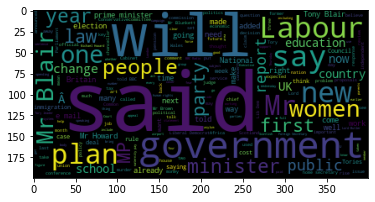

In [6]:
wc = WordCloud(stopwords=STOPWORDS).generate(' '.join(genres['politics']))
imshow(wc)

# RegEx

In [7]:
strings='The house no.s are ab123, Ab123, ED345,eG456'
re.findall('[A-Z]{1,2}[a-z]?[0-9]+',strings)

['Ab123', 'ED345', 'G456']

In [8]:
print(re.findall('\bclass\b','The class is not there today'))
print(re.findall(r'\bclass\b','The class is not there today'))
print(re.findall(r'\bclass\b','Misclassification errors occur in ML classification tasks'))


[]
['class']
[]


In [9]:
print(re.findall(r'^[\w]+','Class is there today'))
print(re.findall(r'[\w]$','Class is there today 123'))

['Class']
['3']


In [10]:
para=\
'''
<p>
35th is the last floor.
At the 4th floor, my office is on that floor.
30th floor is the cafeteria and gym floor.
</p>
'''

In [11]:
para

'\n<p>\n35th is the last floor.\nAt the 4th floor, my office is on that floor.\n30th floor is the cafeteria and gym floor.\n</p>\n'

In [12]:
print(re.findall(r"^[0-9]+",para))
print(re.findall(r"^[0-9]+",para, re.MULTILINE))
print(re.findall(r"floor.$",para, re.MULTILINE))


[]
['35', '30']
['floor.', 'floor.', 'floor.']


In [13]:
para=\
'''
<p>
lauronen_123@live.com
paulv.cham@live.com
sjmuir@sbcglobal.net
kobayasi.pioio@aol.com
yruan@mac.com
schwaang.123kjsd@optonline.net
dkasak@att.net
wilsonpm@hotmail.com
dogdude@me.com
arachne@hotmail.com
mwilson123.msxd@gmail.com
jugalator@verizon.net
</p>
'''

In [14]:
re.findall('.*(?=@)@(?<=@).*',para,re.MULTILINE)

['lauronen_123@live.com',
 'paulv.cham@live.com',
 'sjmuir@sbcglobal.net',
 'kobayasi.pioio@aol.com',
 'yruan@mac.com',
 'schwaang.123kjsd@optonline.net',
 'dkasak@att.net',
 'wilsonpm@hotmail.com',
 'dogdude@me.com',
 'arachne@hotmail.com',
 'mwilson123.msxd@gmail.com',
 'jugalator@verizon.net']

In [15]:
code='AmulMilkXXX17/10/202064.5'
print(re.findall('[\w]+(?=[A-Z]{3})',code))
print(re.findall('(?<=[0-9]{2}/[0-9]{2}/[0-9]{4}).*',code))

['AmulMilk']
['64.5']


In [16]:
print(re.findall("subhasis(?= dasgupta)","The names are subhasis dasgupta and subhasis rastogi") ) #Look ahead

print(re.findall("(?<=subhasis )\w+","The names are subhasis dasgupta and subhasis rastogi") ) #Look behind

['subhasis']
['dasgupta', 'rastogi']


# TFIDF

In [17]:
politics=pd.DataFrame(genres['politics'])
business=pd.DataFrame(genres['business'])
entertainment=pd.DataFrame(genres['entertainment'])

In [18]:
politics[1]='Politics'
business[1]='business'
entertainment[1]='entertainment'

In [19]:
data=pd.concat([politics,business,entertainment],axis=0)
data.columns=['text','context']

In [20]:
from sklearn.feature_extraction.text import TfidfVectorizer
t=TfidfVectorizer(max_df=0.9)
tsvd=t.fit(data['text'])
tfidf_mat = tsvd.transform(data['text'])

In [21]:
from sklearn.decomposition import TruncatedSVD
tsvd = TruncatedSVD(n_components=100)
svd_mat=tsvd.fit_transform(tfidf_mat)

In [22]:
svd_mat.shape

(939, 100)

In [23]:
from sklearn.manifold import TSNE
from sklearn.preprocessing import LabelEncoder
tsne=TSNE(n_components=3,random_state=123)
le=LabelEncoder()
contexts=le.fit_transform(data['context'])
tsne_mat=tsne.fit_transform(svd_mat)

In [24]:
data['first']=tsne_mat[:,0]
data['second']=tsne_mat[:,1]
data['third']=tsne_mat[:,2]

In [25]:
fig=px.scatter_3d(data, x='first', y='second',z='third', color='context' , labels='context')
fig.show()

In [26]:
tsvd = TruncatedSVD(n_components=50)
svd_mat = tsvd.fit_transform(tfidf_mat)

In [27]:
svd_mat.shape

(939, 50)

In [28]:
data.iloc[803,0]

'Brit awards for Devon music acts\n\nDevon singer Joss Stone and rock band Muse won coveted Brit awards during the event\'s 25th anniversary.\n\nSeventeen-year-old Stone, from near Cullumpton, won two awards: best British female act, and best urban act out of three award nominations. Muse, whose members met in south Devon, beat Franz Ferdinand, Jamie Cullum, Kasabian and The Libertines for best British live act. The band has sold about two million records worldwide.\n\nAfter beating Amy Winehouse, Jamelia, Natasha Bedingfield and PJ Harvey to the best British female prize, Joss Stone said: "I don\'t know what to say. I don\'t like doing this at all. I\'d like to thank my family for being really supportive and everybody that made my record with me." "I don\'t even know what to do right now. Thank you all you guys for voting for me, I feel sick right now." Viewers of digital music TV channel MTV Base voted Stone the winner in the best urban act category. Ms Stone also performed her song 

In [29]:
q1 = 'Brit awards for Devon music acts\n\nDevon singer Joss Stone and rock band Muse won coveted Brit awards during the event\'s 25th anniversary.\n\nSeventeen-year-old Stone, from near Cullumpton, won two awards: best British female act, and best urban act out of three award nominations. Muse, whose members met in south Devon, beat Franz Ferdinand, Jamie Cullum, Kasabian and The Libertines for best British live act. The band has sold about two million records worldwide.\n\nAfter beating Amy Winehouse, Jamelia, Natasha Bedingfield and PJ Harvey to the best British female prize, Joss Stone said: "I don\'t know what to say. I don\'t like doing this at all. I\'d like to thank my family for being really supportive and everybody that made my record with me." "I don\'t even know what to do right now. Thank you all you guys for voting for me, I feel sick right now." Viewers of digital music TV channel MTV Base voted Stone the winner in the best urban act category. Ms Stone also performed her song Right To Be Wrong, backed by a gospel choir, at the 25th award ceremony at London\'s Earls Court. Her second album Mind, Body & Soul reached number one in the UK charts last October and went straight into the US charts at number 11.\n\nThe teenager also has Grammy nominations in the US, normally dominated by home-grown acts. Born Jocelyn Stoker, the Devon diva started her career in a BBC talent programme, and was then discovered at a New York audition by a US record executive, Steve Greenberg. Indie Rock group Muse consists of Matthew Bellamy, Chris Wolstenholme and Dominic Howard who met in their early teens in Teignmouth, south Devon. Dominic Howard said of winning: "We love playing live, it\'s very important for our band. So to win something like this really feels great." The trio met aged 13 and formed the band Gothic Plague, changing its name to Fixed Penalty, Rocket Baby Dolls and finally Muse. The band released its first self-titled EP in 1998. The third studio album, Absolution, was released in 2003, providing the hit singles Time Is Running Out, Hysteria, and Butterflies And Hurricanes.\n'

In [30]:
q1_f = t.transform([q1])
q1_formatted = tsvd.transform(q1_f)

ValueError: max_df corresponds to < documents than min_df

In [ ]:
from sklearn.metrics import pairwise_distances
d = pairwise_distances(X = q1_formatted, Y=svd_mat, metric='cosine')

data.iloc[np.argmin(d),0]

NameError: name 'q1_formatted' is not defined

# Word embeddings

In [ ]:
tsvd_wv  =TruncatedSVD(n_components=200)
word_mat = tsvd_wv.fit_transform(tfidf_mat.T)
word_mat.shape

(18811, 200)

In [ ]:
wd_q1 = 'film'

In [ ]:
t.vocabulary_[wd_q1]

7120

In [ ]:
k_similar_words = 10

In [ ]:
wd_query_array = word_mat[t.vocabulary_[wd_q1],:].reshape(1,-1)

In [ ]:
from sklearn.metrics import pairwise_distances

In [ ]:
wd_d = pairwise_distances(X=word_mat,Y=wd_query_array)

In [ ]:
import numpy as np

In [ ]:
k_sim_words_index=np.argsort(wd_d.flatten())[1:10]

In [ ]:
id2word = {v:k for k,v in t.vocabulary_.items()}

In [ ]:
[id2word[x] for x in k_sim_words_index]

['director',
 'films',
 'oscar',
 'actress',
 'actor',
 'movie',
 'who',
 'won',
 'story']